# **Proyek Akhir "Application-Based Prediksi UMR Regional"**

Rencana Output : Sebuah application based yang melakukan prediksi UMR untuk setiap regional di tahun selanjutnya, yang nantinya ada menampilkan grafik pertumbuhan UMR untuk setiap regional dll(yang masih didiskusikan).

# **Data Preparation**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import joblib
warnings.filterwarnings('ignore')

In [52]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/mzakibhr/ProyekAkhir-Orbit-Prediksi_UMR_Regional/main/Indonesian%20Salary%20by%20Region%20(1997-2022).csv')

In [53]:
df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [54]:
sorted(set(df['REGION'].tolist()))

['ACEH',
 'BALI',
 'BANTEN',
 'BENGKULU',
 'DI YOGYAKARTA',
 'DKI JAKARTA',
 'GORONTALO',
 'INDONESIA',
 'JAMBI',
 'JAWA BARAT',
 'JAWA TENGAH',
 'JAWA TIMUR',
 'KALIMANTAN BARAT',
 'KALIMANTAN SELATAN',
 'KALIMANTAN TENGAH',
 'KALIMANTAN TIMUR',
 'KALIMANTAN UTARA',
 'KEP. BANGKA BELITUNG',
 'KEP. RIAU',
 'LAMPUNG',
 'MALUKU',
 'MALUKU UTARA',
 'NUSA TENGGARA BARAT',
 'NUSA TENGGARA TIMUR',
 'PAPUA',
 'PAPUA BARAT',
 'RIAU',
 'SULAWESI BARAT',
 'SULAWESI SELATAN',
 'SULAWESI TENGAH',
 'SULAWESI TENGGARA',
 'SULAWESI UTARA',
 'SUMATERA BARAT',
 'SUMATERA SELATAN',
 'SUMATERA UTARA']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  870 non-null    object
 1   SALARY  870 non-null    int64 
 2   YEAR    870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


In [56]:
print("Regional Di Dataset :")
print(df.REGION.unique())
print("\nJumlah Regional :")
print(len(df.REGION.unique()))

Regional Di Dataset :
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. RIAU' 'DKI JAKARTA'
 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA' 'JAWA TIMUR' 'BALI'
 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR' 'KALIMANTAN BARAT'
 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN' 'KALIMANTAN TIMUR'
 'SULAWESI UTARA' 'SULAWESI TENGAH' 'SULAWESI SELATAN' 'SULAWESI TENGGARA'
 'MALUKU' 'PAPUA' 'INDONESIA' 'KEP. BANGKA BELITUNG' 'BANTEN' 'GORONTALO'
 'MALUKU UTARA' 'SULAWESI BARAT' 'PAPUA BARAT' 'KALIMANTAN UTARA']

Jumlah Regional :
35


# **Data Visualization**

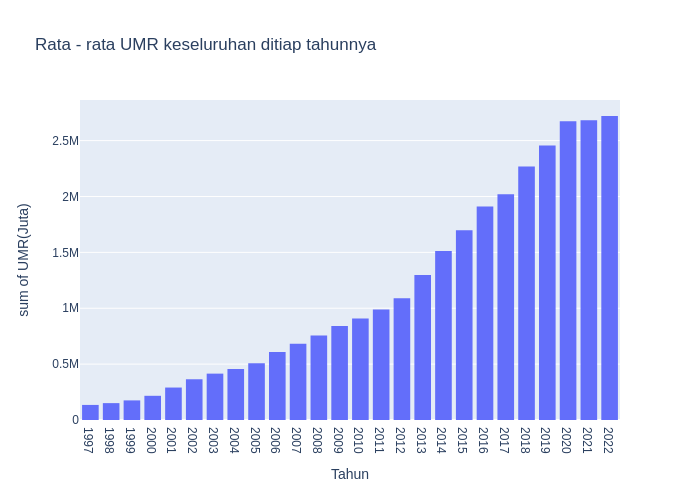

In [57]:
# Visualisasi rata-rata UMR keseluruhan per tahun
avg_incr=df.groupby(["YEAR"]).mean().reset_index()

fig = px.histogram(avg_incr, x='YEAR', y="SALARY",
  labels={
      "YEAR": "Tahun",
      "SALARY": "UMR(Juta)",
      },
 title="Rata - rata UMR keseluruhan ditiap tahunnya")
fig.update_xaxes(type='category')
fig.show("png")

In [58]:
# Cek Pertumbuhan/Tahun
growth=[0]
for i in range(1,26):
    growth.append(avg_incr["SALARY"][i]-avg_incr["SALARY"][i-1])

avg_incr["growth"]=growth
avg_incr.head()

,YEAR,SALARY,growth
0,1997,134964.285714,0.000000
1,1998,150937.500000,15973.214286
2,1999,175390.625000,24453.125000
3,2000,216506.250000,41115.625000
4,2001,290487.500000,73981.250000


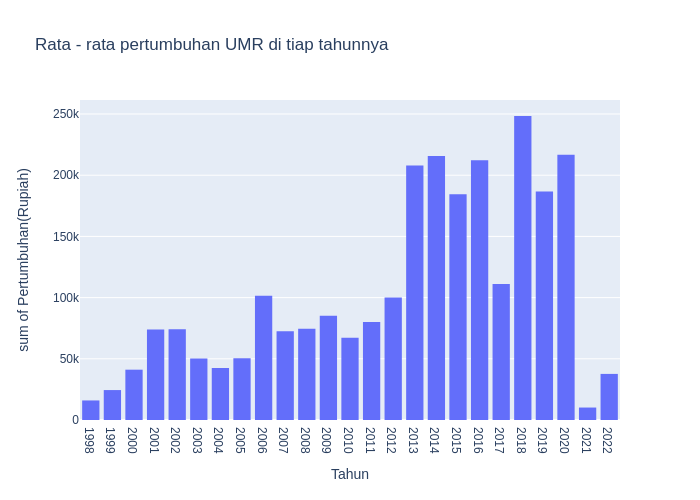

In [59]:
# Visualisasi rata-rata pertumbuhan UMR keseluruhan pertahun
fig = px.histogram(avg_incr, x='YEAR', y="growth",
  labels={
      "YEAR": "Tahun",
      "growth": "Pertumbuhan(Rupiah)",
      },
 title="Rata - rata pertumbuhan UMR di tiap tahunnya")
fig.update_xaxes(type='category')
fig.show("png")

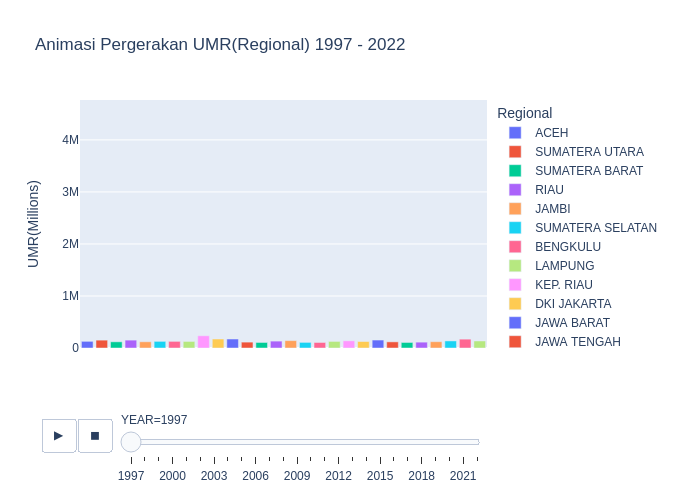

In [60]:
# Visualisasi pergerakan UMR per Regional (tahun 1997-2022)

fig = px.bar(df, x='REGION', y="SALARY",color="REGION",
  animation_frame="YEAR", range_y=[0,4766460], 
  labels={
      "REGION": "Region",
      "SALARY": "UMR(Millions)",
      "REGION": "Regional"
      },
 title="Animasi Pergerakan UMR(Regional) 1997 - 2022")
fig.update_layout(xaxis_visible=False, xaxis_showticklabels=False)
fig.show("png")

## **Visualisasi Growth Untuk tiap Regional** (Mungkin akan digunakan untuk Dashboard saat Deploy)

In [61]:
#@title Masukkan nama Regional yang ingin dilihat
reg = "DKI JAKARTA" #@param {type:"string"}

In [62]:
reg = reg.upper()
df_reg = df[df.REGION.str.contains(reg)].reset_index()

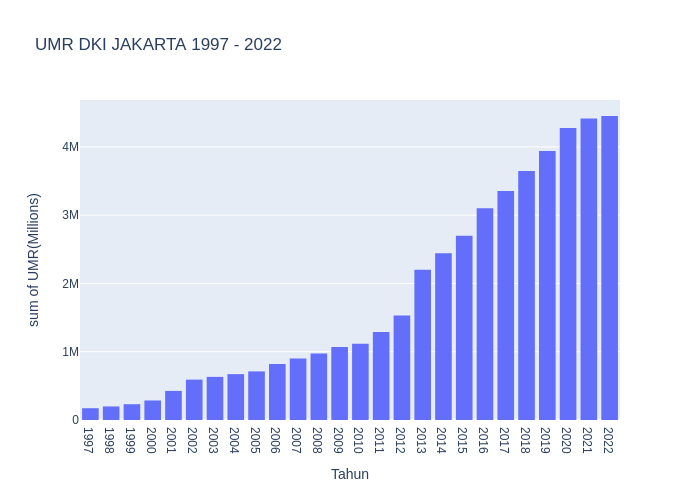

In [63]:
# Visualisasi pergerakan UMR per Regional (tahun 1997-2022)
fig = px.histogram(df_reg, x='YEAR', y="SALARY",
  labels={
      "YEAR": "Tahun",
      "SALARY": "UMR(Millions)",
      },
 title="UMR %s 1997 - 2022" %reg)
fig.update_xaxes(type='category')
fig.show("png")

In [64]:
# Cek Pertumbuhan per Tahun Regional
growth_reg=[0]
for i in range(1,26):
    growth_reg.append(df_reg["SALARY"][i]-df_reg["SALARY"][i-1])

df_reg["growth"]=growth_reg
df_reg.head()

,index,REGION,SALARY,YEAR,growth
0,9,DKI JAKARTA,172500,1997,0
1,38,DKI JAKARTA,198500,1998,26000
2,70,DKI JAKARTA,231000,1999,32500
3,102,DKI JAKARTA,286000,2000,55000
4,134,DKI JAKARTA,426300,2001,140300


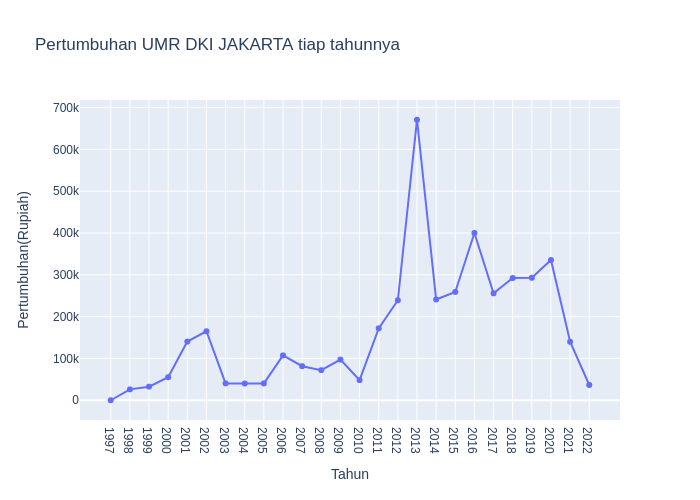

In [65]:
# Visualisasi rata-rata pertumbuhan UMR keseluruhan per tahun
fig = px.line(df_reg, x='YEAR', y="growth", 
  labels={
      "YEAR": "Tahun",
      "growth": "Pertumbuhan(Rupiah)",
      },
 title="Pertumbuhan UMR %s tiap tahunnya" %reg, markers=True)
fig.update_xaxes(type='category')
fig.show("png")

# **Preprocessing Data**


In [66]:
# Mencari Jumlah Missing Value pada data_train
print(df.isnull().sum())
df.shape

REGION    0
SALARY    0
YEAR      0
dtype: int64


(870, 3)

In [67]:
# Import library
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["REGION_Cat"] = encoder.fit_transform(df["REGION"])

In [68]:
df = df[["REGION", "REGION_Cat", "SALARY", "YEAR"]]

In [69]:
df.to_csv(index=False)

'REGION,REGION_Cat,SALARY,YEAR\nACEH,0,128000,1997\nSUMATERA UTARA,34,151000,1997\nSUMATERA BARAT,32,119000,1997\nRIAU,26,151500,1997\nJAMBI,8,119500,1997\nSUMATERA SELATAN,33,127500,1997\nBENGKULU,3,127500,1997\nLAMPUNG,19,126000,1997\nKEP. RIAU,18,235000,1997\nDKI JAKARTA,5,172500,1997\nJAWA BARAT,9,172500,1997\nJAWA TENGAH,10,113000,1997\nDI YOGYAKARTA,4,106500,1997\nJAWA TIMUR,11,132500,1997\nBALI,1,141500,1997\nNUSA TENGGARA BARAT,22,108000,1997\nNUSA TENGGARA TIMUR,23,106000,1997\nKALIMANTAN BARAT,12,126500,1997\nKALIMANTAN TENGAH,14,138000,1997\nKALIMANTAN SELATAN,13,125000,1997\nKALIMANTAN TIMUR,15,153000,1997\nSULAWESI UTARA,31,118000,1997\nSULAWESI TENGAH,29,106500,1997\nSULAWESI SELATAN,28,112500,1997\nSULAWESI TENGGARA,30,121000,1997\nMALUKU,20,136000,1997\nPAPUA,24,170000,1997\nINDONESIA,7,135000,1997\nACEH,0,147000,1998\nSUMATERA UTARA,34,174000,1998\nSUMATERA BARAT,32,137000,1998\nRIAU,26,174000,1998\nJAMBI,8,137500,1998\nSUMATERA SELATAN,33,146500,1998\nBENGKULU,3,14650

In [70]:
encoder.classes_

array(['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA',
       'DKI JAKARTA', 'GORONTALO', 'INDONESIA', 'JAMBI', 'JAWA BARAT',
       'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN BARAT',
       'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR',
       'KALIMANTAN UTARA', 'KEP. BANGKA BELITUNG', 'KEP. RIAU', 'LAMPUNG',
       'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT',
       'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU',
       'SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH',
       'SULAWESI TENGGARA', 'SULAWESI UTARA', 'SUMATERA BARAT',
       'SUMATERA SELATAN', 'SUMATERA UTARA'], dtype=object)

# **Modeling**



## 1. Linear Regression

In [71]:
# Buat Model yang pake Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Split data train dan test
X = df.drop(['SALARY','REGION'], axis = 1)
y = df['SALARY']
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=4)

#Fit dengan Model Linear Regression
lin_reg = LinearRegression()
model_lr = lin_reg.fit(X_train_lr, y_train_lr)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[  4030.83723014 112142.47478521]
-224272536.84800836


In [72]:
df

,REGION,REGION_Cat,SALARY,YEAR
0,ACEH,0,128000,1997
1,SUMATERA UTARA,34,151000,1997
2,SUMATERA BARAT,32,119000,1997
3,RIAU,26,151500,1997
4,JAMBI,8,119500,1997
...,...,...,...,...
865,MALUKU,20,2619312,2022
866,MALUKU UTARA,21,2862231,2022
867,PAPUA BARAT,25,3200000,2022
868,PAPUA,24,3561932,2022


In [73]:
#Menyimpan hasil akurasi
accuracy_lr = model_lr.score(X_test_lr, y_test_lr)

In [74]:
#Melihat hasil accuracy dari model
print(f"Akurasi Model Linear Regression: {accuracy_lr * 100}%")

Akurasi Model Linear Regression: 83.33651157054544%


In [75]:
#Simpan dalam joblib untuk deployment
joblib.dump((model_lr), "umr-model-lr.pkl")

['umr-model-lr.pkl']

In [76]:
# Contoh Hasil Prediksi UMR "Regional = 1" di Tahun 2024
lin_reg.predict([[1,2024]])

array([2707862.95449188])

## 2. Random Forest

In [77]:
#Split data train dan test
X = df.drop(['SALARY','REGION'], axis = 1)
y = df['SALARY']

from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=4)

In [78]:
X_train_rf.shape
y_train_rf.shape

(696,)

In [79]:
#Fit menggunakan model Random Forest
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()
model_rf = ran_for.fit(X_train_rf, y_train_rf)

In [80]:
#Menyimpan hasil akurasi
accuracy_rf = model_rf.score(X_test_rf, y_test_rf)

In [81]:
#Melihat hasil accuracy dari model
print(f"Akurasi Model Random Forest: {accuracy_rf * 100}%")

Akurasi Model Random Forest: 96.63505375498946%


In [82]:
#Simpan dalam joblib untuk deployment
joblib.dump((model_rf), "umr-model-rf.pkl")

['umr-model-rf.pkl']

In [83]:
# Contoh Hasil Prediksi UMR "Regional = 1" di Tahun 2024
ran_for.predict([[1,2024]])

array([2534043.13])

# **Evaluate Model**

## 1. Linear Regression

Mengevaluasi performa model Linear Regression yang telah dibuat dengan menggunakan evaluation metrics Coefficient of Determination, MSE (Mean Squared Error) dan RMSE (Root Mean Squared Error).

In [84]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [85]:
# Coefficient of Determination

print(type(X_test_lr))

y_pred_lr = lin_reg.predict(X_test_lr)
r_squared = r2_score(y_test_lr, y_pred_lr)

print(f'R-squared: {r_squared * 100}%')

<class 'pandas.core.frame.DataFrame'>
R-squared: 83.33651157054544%


*Nilai R-squared akan lebih baik apabila semakin mendekati nilai "1"

In [86]:
# Mean Squared Error
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
print('Mean Squared Error = ', mse_lr)

Mean Squared Error =  144684994335.15085


In [87]:
# Root Mean Squared Error
rmse_lr = mean_squared_error(y_test_lr, y_pred_lr, squared = False)
print('Root Mean Squared Error = ', rmse_lr)

Root Mean Squared Error =  380374.8077030744


*Nilai RMSE dan MSE lebih baik jika semakin mendekati nilai 0

## 2. Random Forest

Mengevaluasi performa model Random Forest yang telah dibuat dengan menggunakan evaluation metrics Coefficient of Determination, MSE (Mean Squared Error) dan RMSE (Root Mean Squared Error).

In [88]:
# Coefficient of Determination

y_pred_rf = ran_for.predict(X_test_rf)
r_squared = r2_score(y_test_rf, y_pred_rf)

print(f'R-squared: {r_squared * 100}%')

R-squared: 96.63505375498946%


*Nilai R-squared akan lebih baik apabila semakin mendekati nilai "1"

In [89]:
# Mean Squared Error
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
print('Mean Squared Error = ', mse_rf)

Mean Squared Error =  29217005218.238922


In [90]:
# Root Mean Squared Error
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared = False)
print('Root Mean Squared Error = ', rmse_rf)

Root Mean Squared Error =  170929.82542037222


*Nilai RMSE dan MSE lebih baik jika semakin mendekati nilai 0

# **Deployment**

In [91]:
#@title Masukin Regional yang ingin dilihat
reg = "DKI JAKARTA" #@param {type:"string"}
thn = 2028#@param {type:"integer"}

In [92]:
reg = reg.upper()
df_dep = df[df.REGION.str.contains(reg)].reset_index()
reg_cat = df_dep._get_value(0, "REGION_Cat")
df_dep.drop(columns='index')

,REGION,REGION_Cat,SALARY,YEAR
0,DKI JAKARTA,5,172500,1997
1,DKI JAKARTA,5,198500,1998
2,DKI JAKARTA,5,231000,1999
3,DKI JAKARTA,5,286000,2000
4,DKI JAKARTA,5,426300,2001
5,DKI JAKARTA,5,591300,2002
6,DKI JAKARTA,5,631600,2003
7,DKI JAKARTA,5,671600,2004
8,DKI JAKARTA,5,711843,2005
9,DKI JAKARTA,5,819100,2006


In [93]:
#Fungsi untuk mengubah format menjadi rupiah
def formatrupiah(uang):
    y = str(uang)
    if len(y) <= 3 :
        return 'Rp ' + y     
    else :
        p = y[-3:]
        q = y[:-3]
        return formatrupiah(q) + '.' + p

In [94]:
#Hasil prediksi
print('Prediksi UMR %s di tahun %d' %(reg, thn))
prediksi = float(lin_reg.predict([[reg_cat,thn]]))
print(formatrupiah(int(prediksi)))

Prediksi UMR DKI JAKARTA di tahun 2028
Rp 3.172.556


In [95]:
#Melakukan prediksi - tahun yang diinput
pred = []
for i in range(2023,thn):
  pred.append([reg, reg_cat, int(lin_reg.predict([[reg_cat,i]])), i])

# Set Array ke DataFrame
df_pred = pd.DataFrame(pred)
df_pred.columns = ['REGION', 'REGION_Cat', 'SALARY', 'YEAR']
df_pred

,REGION,REGION_Cat,SALARY,YEAR
0,DKI JAKARTA,5,2611843,2023
1,DKI JAKARTA,5,2723986,2024
2,DKI JAKARTA,5,2836128,2025
3,DKI JAKARTA,5,2948271,2026
4,DKI JAKARTA,5,3060413,2027


In [96]:
#Concat hasil prediksi dengan data UMR
df_newpred = pd.concat([df_dep, df_pred], ignore_index=True)

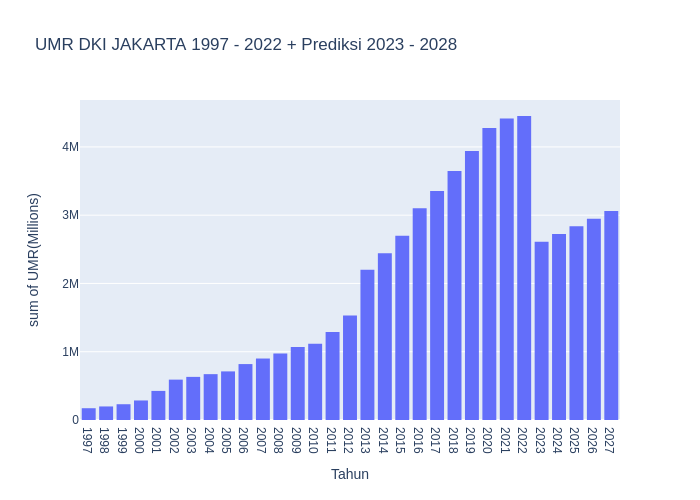

In [97]:
# Visualisasi pergerakan UMR per Regional (tahun 1997-2022)
fig = px.histogram(df_newpred, x='YEAR', y="SALARY",
  labels={
      "YEAR": "Tahun",
      "SALARY": "UMR(Millions)",
      },
 title="UMR %s 1997 - 2022 + Prediksi 2023 - %s" %(reg, thn))
fig.update_xaxes(type='category')
fig.show("png")